In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/sample_submission.csv
/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/test.csv
/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/LICENSE
/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/README.md
/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/meta/esc50.csv
/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/meta/esc50-human.xlsx
/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/audio/5-257349-A-15.wav
/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/audio/5-195557-A-19.wav
/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/audio/2-122820-B-36.wav
/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/audio/1-115920-A-22.wav
/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/audio/1-172649-C-40.wav
/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/audio/

In [3]:
# import pandas as pd

# submission = pd.read_csv("/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/sample_submission.csv")

# submission.iloc[:, 1] = submission.iloc[0, 1]

# submission.to_csv("submission.csv", index=False)

# print("Submission ready!")


Total songs in blues: 100
Selected song: blues.00095
Available stems: ['drums.wav', 'vocals.wav', 'bass.wav', 'other.wav']

Sample Rate: 44100
Duration (seconds): 30.013333333333332
Total samples: 1323588


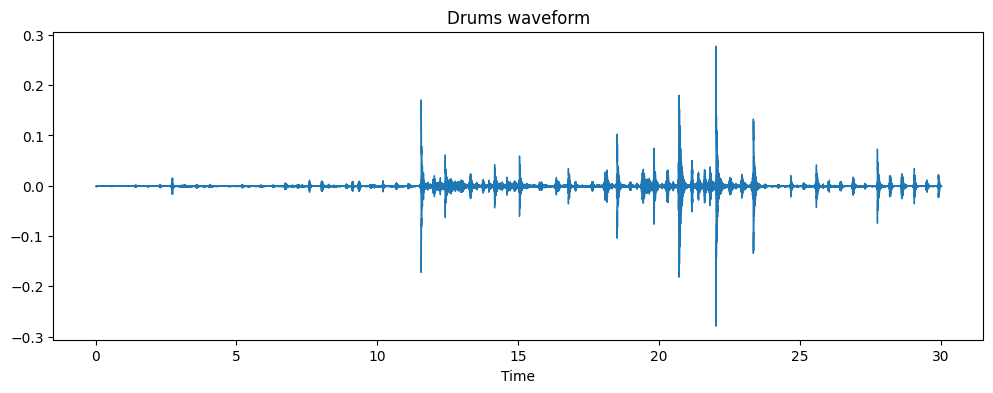

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Correct base path (based on your output)
BASE_PATH = "/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/genres_stems"

# choose one genre
genre = "blues"

genre_path = os.path.join(BASE_PATH, genre)

songs = os.listdir(genre_path)

print("Total songs in blues:", len(songs))

# pick first song
song = songs[0]

print("Selected song:", song)

song_path = os.path.join(genre_path, song)

stems = os.listdir(song_path)

print("Available stems:", stems)


# load drums stem
audio_path = os.path.join(song_path, "drums.wav")

y, sr = librosa.load(audio_path, sr=None)

print("\nSample Rate:", sr)
print("Duration (seconds):", len(y)/sr)
print("Total samples:", len(y))


# plot waveform
plt.figure(figsize=(12,4))
librosa.display.waveshow(y, sr=sr)
plt.title("Drums waveform")
plt.show()

Selected songs: ['blues.00061', 'blues.00094', 'blues.00062', 'blues.00044']

Mashup created
Sample rate: 44100
Duration: 30.013333333333332


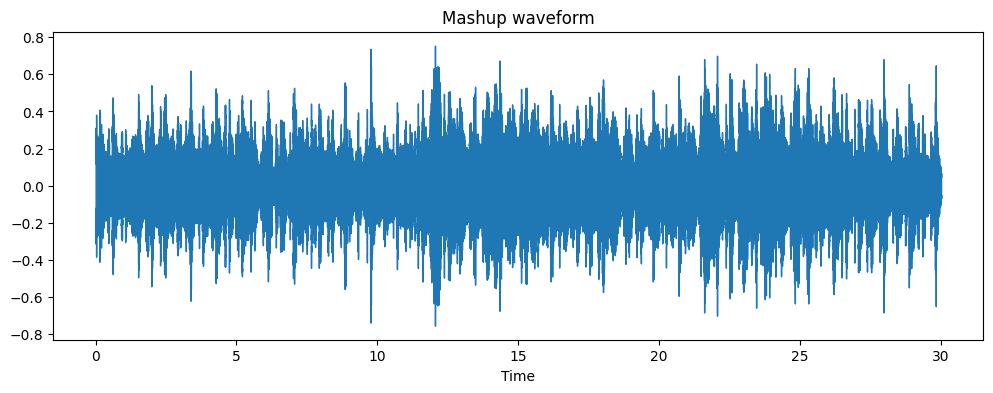

In [6]:
import librosa
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import librosa.display

BASE_PATH = "/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/genres_stems"

genre = "blues"

genre_path = os.path.join(BASE_PATH, genre)

songs = os.listdir(genre_path)

# randomly pick 4 different songs
selected_songs = random.sample(songs, 4)

print("Selected songs:", selected_songs)

# load stems from different songs

drums, sr = librosa.load(os.path.join(genre_path, selected_songs[0], "drums.wav"), sr=None)

vocals, _ = librosa.load(os.path.join(genre_path, selected_songs[1], "vocals.wav"), sr=None)

bass, _ = librosa.load(os.path.join(genre_path, selected_songs[2], "bass.wav"), sr=None)

other, _ = librosa.load(os.path.join(genre_path, selected_songs[3], "other.wav"), sr=None)


# create mashup
mashup = drums + vocals + bass + other


print("\nMashup created")
print("Sample rate:", sr)
print("Duration:", len(mashup)/sr)


# plot waveform
plt.figure(figsize=(12,4))
librosa.display.waveshow(mashup, sr=sr)
plt.title("Mashup waveform")
plt.show()

Mel shape: (128, 2586)


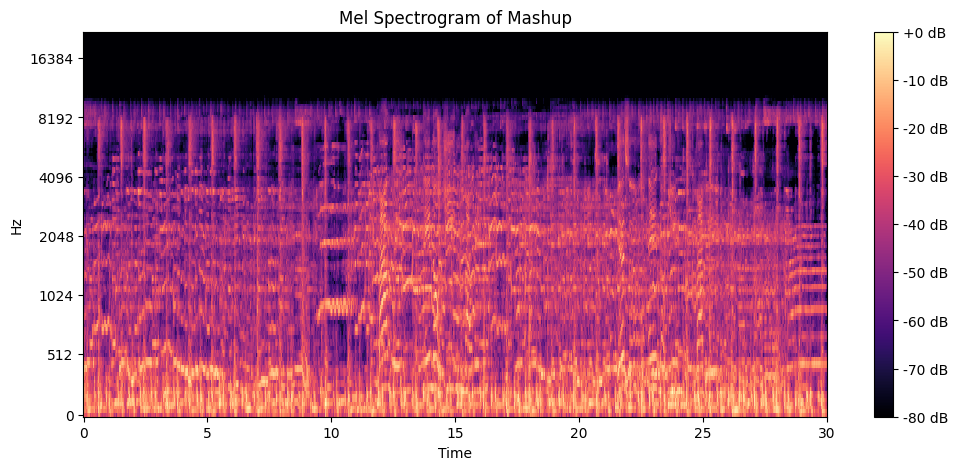

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# create mel spectrogram
mel = librosa.feature.melspectrogram(
    y=mashup,
    sr=sr,
    n_mels=128,
    hop_length=512
)

# convert to log scale (very important)
mel_db = librosa.power_to_db(mel, ref=np.max)

print("Mel shape:", mel_db.shape)

# plot mel spectrogram
plt.figure(figsize=(12,5))
librosa.display.specshow(
    mel_db,
    sr=sr,
    hop_length=512,
    x_axis="time",
    y_axis="mel"
)

plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram of Mashup")
plt.show()

In [9]:
FIXED_WIDTH = 2586

X = []
y = []

for genre in genres:
    
    genre_path = os.path.join(BASE_PATH, genre)
    songs = os.listdir(genre_path)
    
    print(f"Processing {genre}...")
    
    for song in tqdm(songs):
        
        song_path = os.path.join(genre_path, song)
        
        drums, sr = librosa.load(os.path.join(song_path, "drums.wav"), sr=None)
        vocals, _ = librosa.load(os.path.join(song_path, "vocals.wav"), sr=None)
        bass, _ = librosa.load(os.path.join(song_path, "bass.wav"), sr=None)
        other, _ = librosa.load(os.path.join(song_path, "other.wav"), sr=None)
        
        audio = drums + vocals + bass + other
        
        mel = librosa.feature.melspectrogram(
            y=audio,
            sr=sr,
            n_mels=128,
            hop_length=512
        )
        
        mel_db = librosa.power_to_db(mel, ref=np.max)
        
        # FIX WIDTH HERE
        if mel_db.shape[1] < FIXED_WIDTH:
            
            pad_width = FIXED_WIDTH - mel_db.shape[1]
            
            mel_db = np.pad(
                mel_db,
                pad_width=((0,0),(0,pad_width)),
                mode='constant'
            )
            
        else:
            
            mel_db = mel_db[:, :FIXED_WIDTH]
        
        
        X.append(mel_db)
        y.append(genre)


X = np.array(X)
y = np.array(y)

print("\nFINAL DATASET SHAPE:")
print("X shape:", X.shape)
print("y shape:", y.shape)

Processing disco...


100%|██████████| 100/100 [00:29<00:00,  3.43it/s]


Processing metal...


100%|██████████| 100/100 [00:27<00:00,  3.61it/s]


Processing reggae...


100%|██████████| 100/100 [00:27<00:00,  3.61it/s]


Processing blues...


100%|██████████| 100/100 [00:27<00:00,  3.60it/s]


Processing rock...


100%|██████████| 100/100 [00:27<00:00,  3.60it/s]


Processing classical...


100%|██████████| 100/100 [00:27<00:00,  3.61it/s]


Processing jazz...


100%|██████████| 100/100 [00:27<00:00,  3.60it/s]


Processing hiphop...


100%|██████████| 100/100 [00:27<00:00,  3.58it/s]


Processing country...


100%|██████████| 100/100 [00:28<00:00,  3.57it/s]


Processing pop...


100%|██████████| 100/100 [00:27<00:00,  3.58it/s]



FINAL DATASET SHAPE:
X shape: (1000, 128, 2586)
y shape: (1000,)


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_encoded = le.fit_transform(y)

print("Example labels:")
print(y[:5])
print(y_encoded[:5])

Example labels:
['disco' 'disco' 'disco' 'disco' 'disco']
[3 3 3 3 3]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(X_train.shape, X_val.shape)

(800, 128, 2586) (200, 128, 2586)


In [12]:
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]

print(X_train.shape)

(800, 128, 2586, 1)


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,2586,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

2026-02-22 20:33:39.337025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771792419.549379      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771792419.607591      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771792420.131232      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771792420.131269      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771792420.131272      55 computation_placer.cc:177] computation placer alr

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 2584, 16)  │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 1292, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 1290, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 645, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 643, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 321, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 287616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    18,407,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,431,434 (70.31 MB)

 Trainable params: 18,431,434 (70.31 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    batch_size=16
)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.0822 - loss: 247.6718 - val_accuracy: 0.1150 - val_loss: 2.2639
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.2987 - loss: 2.1020 - val_accuracy: 0.3200 - val_loss: 1.8573
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.6695 - loss: 1.0934 - val_accuracy: 0.3900 - val_loss: 1.6319
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.8959 - loss: 0.3575 - val_accuracy: 0.4750 - val_loss: 1.7620
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9824 - loss: 0.1388 - val_accuracy: 0.4050 - val_loss: 1.8705
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9807 - loss: 0.1023 - val_accuracy: 0.4700 - val_loss: 1.9871
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.9909 - loss: 0.0397 - val_accuracy: 0.4550 - val_loss: 2.4132
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.9944 - loss: 0.0334 - val_accuracy: 0.4650 -

test

In [15]:
# import pandas as pd

# BASE = "/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup"

# test_df = pd.read_csv(BASE + "/test.csv")

# print(test_df.head())
# print("Total test files:", len(test_df))

   id              filename
0   1  mashups/song0001.wav
1   2  mashups/song0002.wav
2   3  mashups/song0003.wav
3   4  mashups/song0004.wav
4   5  mashups/song0005.wav
Total test files: 3020


In [17]:
# X_test = []

# for id in tqdm(test_df['id']):
    
#     file_id = str(id).zfill(4)   # converts 1 → 0001
    
#     path = BASE + "/mashups/" + file_id + ".wav"
    
#     audio, sr = librosa.load(path, sr=None)
    
#     mel = librosa.feature.melspectrogram(
#         y=audio,
#         sr=sr,
#         n_mels=128,
#         hop_length=512
#     )
    
#     mel_db = librosa.power_to_db(mel, ref=np.max)
    
#     if mel_db.shape[1] < FIXED_WIDTH:
        
#         pad = FIXED_WIDTH - mel_db.shape[1]
        
#         mel_db = np.pad(mel_db, ((0,0),(0,pad)))
        
#     else:
        
#         mel_db = mel_db[:, :FIXED_WIDTH]
    
    
#     X_test.append(mel_db)


# X_test = np.array(X_test)

# print(X_test.shape)

  0%|          | 0/3020 [00:00<?, ?it/s]/tmp/ipykernel_55/1014708456.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(path, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  0%|          | 0/3020 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/mashups/0001.wav'